In [ ]:
# The analysis aimed to explore the relationship between Work Location (remote vs. non-remote) and the Social Isolation Rating.
# Tools: Point-Biserial Correlation, Violin plot.

In [22]:
import pandas as pd
from scipy.stats import pointbiserialr

file_path = 'C:/Users/oneli/Portfolio/Impact_of_Remote_Work_on_Mental_Health.xlsx'
data = pd.read_excel(file_path)

# Creating new column - Remote_Work
data['Remote_Work'] = data['Work_Location'].apply(lambda x: 1 if x == 'Remote' else 0)

analysis_data = data[['Remote_Work', 'Social_Isolation_Rating']].dropna()

# Point-Biserial Correlation
correlation, p_value = pointbiserialr(
    analysis_data['Remote_Work'], 
    analysis_data['Social_Isolation_Rating']
)

print(f"Point-Biserial Correlation: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


Point-Biserial Correlation: -0.02
P-value: 0.2368
The correlation is not statistically significant.


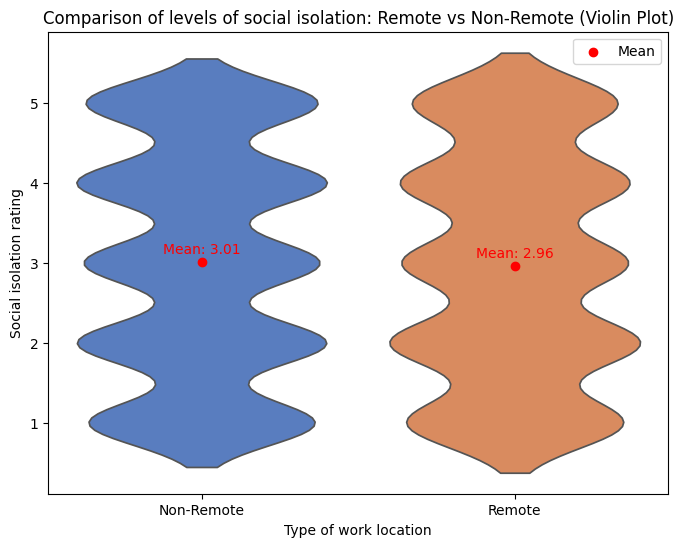

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Creating new columns for grouping - Remote , Non-Remote
data['Work_Type'] = data['Work_Location'].apply(lambda x: 'Remote' if x == 'Remote' else 'Non-Remote')

# Calculating "mean" for each group
group_stats = data.groupby('Work_Type')['Social_Isolation_Rating'].mean()

# Violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Work_Type', y='Social_Isolation_Rating', data=data, inner=None, palette="muted", legend=False, hue='Work_Type')

# Adding "mean"
for i, (work_type, mean) in enumerate(group_stats.items()):
    plt.scatter(i, mean, color='red', label='Mean' if i == 0 else "")
    plt.text(i, mean + 0.1, f"Mean: {mean:.2f}", color='red', ha='center')

plt.title('Comparison of levels of social isolation: Remote vs Non-Remote (Violin Plot)')
plt.xlabel('Type of work location')
plt.ylabel('Social isolation rating')
plt.legend()

plt.show()


In [ ]:
# Conclusions:

# The violin plots for both groups (Remote and Non-Remote work) show almost identical distributions, with no noticeable differences in the spread 
# or shape of the data. The mean Social Isolation Rating for remote workers is 2.96, compared to 3.01 for non-remote workers. This difference is 
# minimal and does not suggest a meaningful variation between the two groups.
# Point-Biserial Correlation: -0.02 with a P-value of 0.2368 indicates that the correlation between work location (remote vs. non-remote) 
# and social isolation is negligible and not statistically significant. This means that there is no strong evidence of a relationship 
# between the two variables.
# The data does not provide strong evidence to suggest that working remotely significantly impacts perceived social isolation compared 
# to working in non-remote environments.